# Percentile, IQR va Outlierlar

**Mavzu:** Kvantillar, Interquartile Range (IQR) va Boxplot Asoslari

**Maqsad:** Ma'lumotlar taqsimotining pozitsiya ko'rsatkichlarini o'rganish va chetga chiquvchi qiymatlarni aniqlash usullarini o'zlashtirish

---

## Reja:
1. **Kvantillar (Quantiles) tushunchasi**
2. **Percentillar va ularning hisoblanishi** 
3. **Quartillar va IQR (Interquartile Range)**
4. **Boxplot va uning talqini**
5. **Outlierlarni aniqlash usullari**
6. **Amaliy misollar va tahlil**

---

## 1. Kutubxonalarni Import qilish

In [24]:
# Import required libraries for statistical analysis and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set plotting style for better visualization
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

## 2. Ma'lumotlar To'plamini Yuklash

In [25]:
# Load the Students Performance dataset
df = pd.read_csv('StudentsPerformance.csv')

# Display basic information about the dataset
print("Ma'lumotlar to'plami haqida umumiy ma'lumot:")
print(f"Qatorlar soni: {df.shape[0]}")
print(f"Ustunlar soni: {df.shape[1]}")
print("\nBirinchi 5 qator:")
df.head()

Ma'lumotlar to'plami haqida umumiy ma'lumot:
Qatorlar soni: 1000
Ustunlar soni: 8

Birinchi 5 qator:


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [26]:
# Display dataset structure and data types
print("Ma'lumotlar turlari:")
print(df.dtypes)
print("\nYo'qolgan qiymatlar:")
print(df.isnull().sum())
print("\nSonli ustunlar bo'yicha asosiy statistikalar:")
df.describe()

Ma'lumotlar turlari:
gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

Yo'qolgan qiymatlar:
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

Sonli ustunlar bo'yicha asosiy statistikalar:


,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## 3. Kvantillar (Quantiles) Tushunchasi

**Kvantil** - ma'lumotlar to'plamini ma'lum foizlarga bo'luvchi qiymat.

### Asosiy kvantillar:
- **Q1 (25% kvantil)** - ma'lumotlarning 25% qismi bu qiymatdan kichik
- **Q2 (50% kvantil)** - mediana, ma'lumotlarning 50% qismi bu qiymatdan kichik
- **Q3 (75% kvantil)** - ma'lumotlarning 75% qismi bu qiymatdan kichik

In [28]:
# Calculate quantiles for math scores
math_scores = df['math score']

# Calculate various quantiles
quantiles = [0.1, 0.25, 0.5, 0.75, 0.9]
quantile_values = math_scores.quantile(quantiles)

print("Matematika baholarining kvantillari:")
for q, val in zip(quantiles, quantile_values):
    print(f"{q*100:4.0f}% kvantil (P{q*100:02.0f}): {val:.2f}")
    
print(f"\nTalqin:")
print(f"- Talabalarning 25% matematikadan {quantile_values[0.25]:.1f} balldan kam olgan")
print(f"- Talabalarning 50% matematikadan {quantile_values[0.5]:.1f} balldan kam olgan (mediana)")
print(f"- Talabalarning 75% matematikadan {quantile_values[0.75]:.1f} balldan kam olgan")

Matematika baholarining kvantillari:
  10% kvantil (P10): 47.00
  25% kvantil (P25): 57.00
  50% kvantil (P50): 66.00
  75% kvantil (P75): 77.00
  90% kvantil (P90): 86.00

Talqin:
- Talabalarning 25% matematikadan 57.0 balldan kam olgan
- Talabalarning 50% matematikadan 66.0 balldan kam olgan (mediana)
- Talabalarning 75% matematikadan 77.0 balldan kam olgan


## 4. Percentillar va Ularning Hisoblanishi

**Percentil** - ma'lumotlar to'plamini 100 ga bo'luvchi kvantillar. 
P50 = mediana, P25 = Q1, P75 = Q3

In [29]:
# Calculate percentiles for reading and writing scores
reading_scores = df['reading score']
writing_scores = df['writing score']

# Define percentiles to calculate
percentiles = [5, 10, 25, 50, 75, 90, 95]

print("Fanlar bo'yicha percentillar:")
print("="*60)

# Create comparison table
comparison_data = []
for p in percentiles:
    math_p = np.percentile(math_scores, p)
    reading_p = np.percentile(reading_scores, p)
    writing_p = np.percentile(writing_scores, p)
    comparison_data.append([f'P{p}', math_p, reading_p, writing_p])

# Create DataFrame for better display
percentile_df = pd.DataFrame(comparison_data, 
                           columns=['Percentil', 'Matematika', 'O\'qish', 'Yozish'])
print(percentile_df.round(2))

Fanlar bo'yicha percentillar:
  Percentil  Matematika  O'qish  Yozish
0        P5       40.95    44.0   42.95
1       P10       47.00    51.0   48.00
2       P25       57.00    59.0   57.75
3       P50       66.00    70.0   69.00
4       P75       77.00    79.0   79.00
5       P90       86.00    87.1   87.00
6       P95       90.05    92.0   92.00


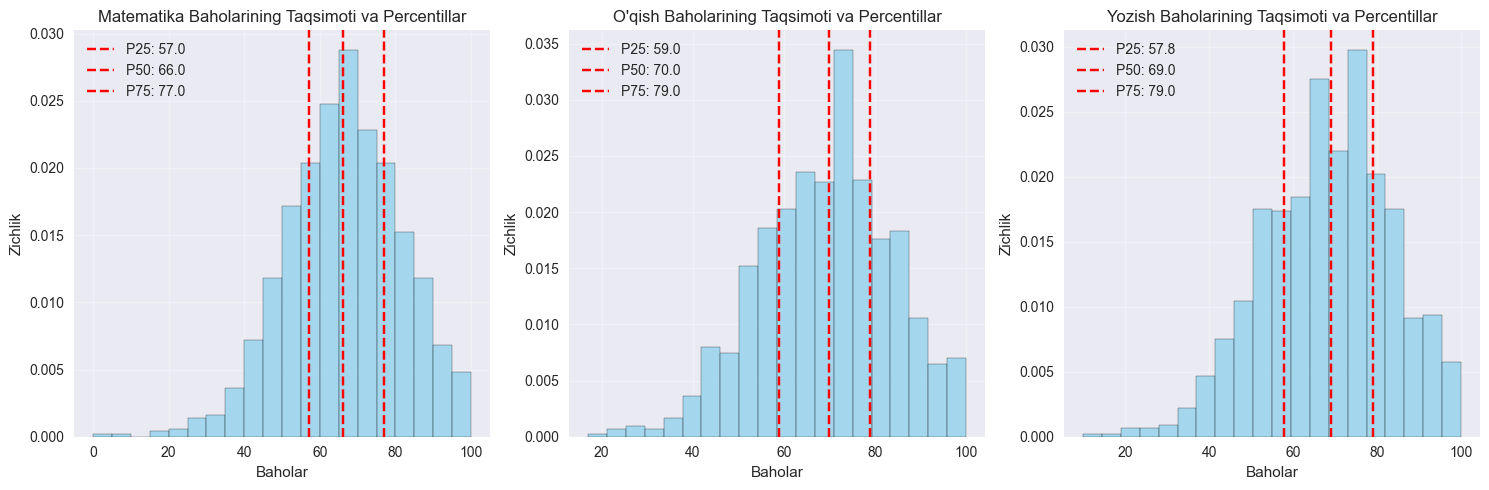

In [30]:
# Visualize percentiles distribution
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
subjects = ['math score', 'reading score', 'writing score']
subject_names = ['Matematika', 'O\'qish', 'Yozish']

for i, (subject, name) in enumerate(zip(subjects, subject_names)):
    # Plot histogram
    axes[i].hist(df[subject], bins=20, alpha=0.7, density=True, color='skyblue', edgecolor='black')
    
    # Add percentile lines
    for p in [25, 50, 75]:
        percentile_val = np.percentile(df[subject], p)
        axes[i].axvline(percentile_val, color='red', linestyle='--', 
                       label=f'P{p}: {percentile_val:.1f}')
    
    axes[i].set_title(f'{name} Baholarining Taqsimoti va Percentillar')
    axes[i].set_xlabel('Baholar')
    axes[i].set_ylabel('Zichlik')
    axes[i].legend()
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 5. Quartillar va IQR (Interquartile Range)

**Quartillar** - ma'lumotlarni 4 teng qismga bo'luvchi kvantillar:
- **Q1**: 25% kvantil
- **Q2**: 50% kvantil (mediana)
- **Q3**: 75% kvantil

**IQR** = Q3 - Q1 (ma'lumotlarning o'rta 50% qismining tarqalishi)

In [31]:
# Calculate quartiles and IQR for all subjects
def calculate_quartiles_iqr(data, subject_name):
    """Calculate quartiles and IQR for given data"""
    Q1 = data.quantile(0.25)
    Q2 = data.quantile(0.50)  # median
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    
    print(f"\n{subject_name} uchun quartillar va IQR:")
    print(f"Q1 (25% kvantil): {Q1:.2f}")
    print(f"Q2 (50% kvantil/Mediana): {Q2:.2f}")
    print(f"Q3 (75% kvantil): {Q3:.2f}")
    print(f"IQR (Q3 - Q1): {IQR:.2f}")
    
    return Q1, Q2, Q3, IQR

# Calculate for all subjects
subjects_data = {
    'Matematika': df['math score'],
    'O\'qish': df['reading score'], 
    'Yozish': df['writing score']
}

quartile_results = {}
for subject_name, data in subjects_data.items():
    Q1, Q2, Q3, IQR = calculate_quartiles_iqr(data, subject_name)
    quartile_results[subject_name] = {'Q1': Q1, 'Q2': Q2, 'Q3': Q3, 'IQR': IQR}


Matematika uchun quartillar va IQR:
Q1 (25% kvantil): 57.00
Q2 (50% kvantil/Mediana): 66.00
Q3 (75% kvantil): 77.00
IQR (Q3 - Q1): 20.00

O'qish uchun quartillar va IQR:
Q1 (25% kvantil): 59.00
Q2 (50% kvantil/Mediana): 70.00
Q3 (75% kvantil): 79.00
IQR (Q3 - Q1): 20.00

Yozish uchun quartillar va IQR:
Q1 (25% kvantil): 57.75
Q2 (50% kvantil/Mediana): 69.00
Q3 (75% kvantil): 79.00
IQR (Q3 - Q1): 21.25


In [32]:
# Create summary table of quartiles
quartile_summary = pd.DataFrame(quartile_results).T
print("\nBarcha fanlar uchun quartillar va IQR jadvali:")
print("="*50)
print(quartile_summary.round(2))

# Interpretation
print("\nTalqin:")
for subject, results in quartile_results.items():
    print(f"\n{subject}:")
    print(f"  - O'rta 50% talabalar {results['Q1']:.1f} va {results['Q3']:.1f} ball orasida")
    print(f"  - IQR = {results['IQR']:.1f} (o'rta qismning tarqalish ko'rsatkichi)")


Barcha fanlar uchun quartillar va IQR jadvali:
               Q1    Q2    Q3    IQR
Matematika  57.00  66.0  77.0  20.00
O'qish      59.00  70.0  79.0  20.00
Yozish      57.75  69.0  79.0  21.25

Talqin:

Matematika:
  - O'rta 50% talabalar 57.0 va 77.0 ball orasida
  - IQR = 20.0 (o'rta qismning tarqalish ko'rsatkichi)

O'qish:
  - O'rta 50% talabalar 59.0 va 79.0 ball orasida
  - IQR = 20.0 (o'rta qismning tarqalish ko'rsatkichi)

Yozish:
  - O'rta 50% talabalar 57.8 va 79.0 ball orasida
  - IQR = 21.2 (o'rta qismning tarqalish ko'rsatkichi)


## 6. Boxplot va Uning Talqini

**Boxplot** - ma'lumotlar taqsimotini vizual ko'rsatish usuli:
- **Box (quti)**: Q1 dan Q3 gacha (IQR)
- **Median chiziq**: Q2 (mediana)
- **Whiskers (mo'ylov)**: minimum va maksimum qiymatlar
- **Outliers**: chetga chiquvchi qiymatlar

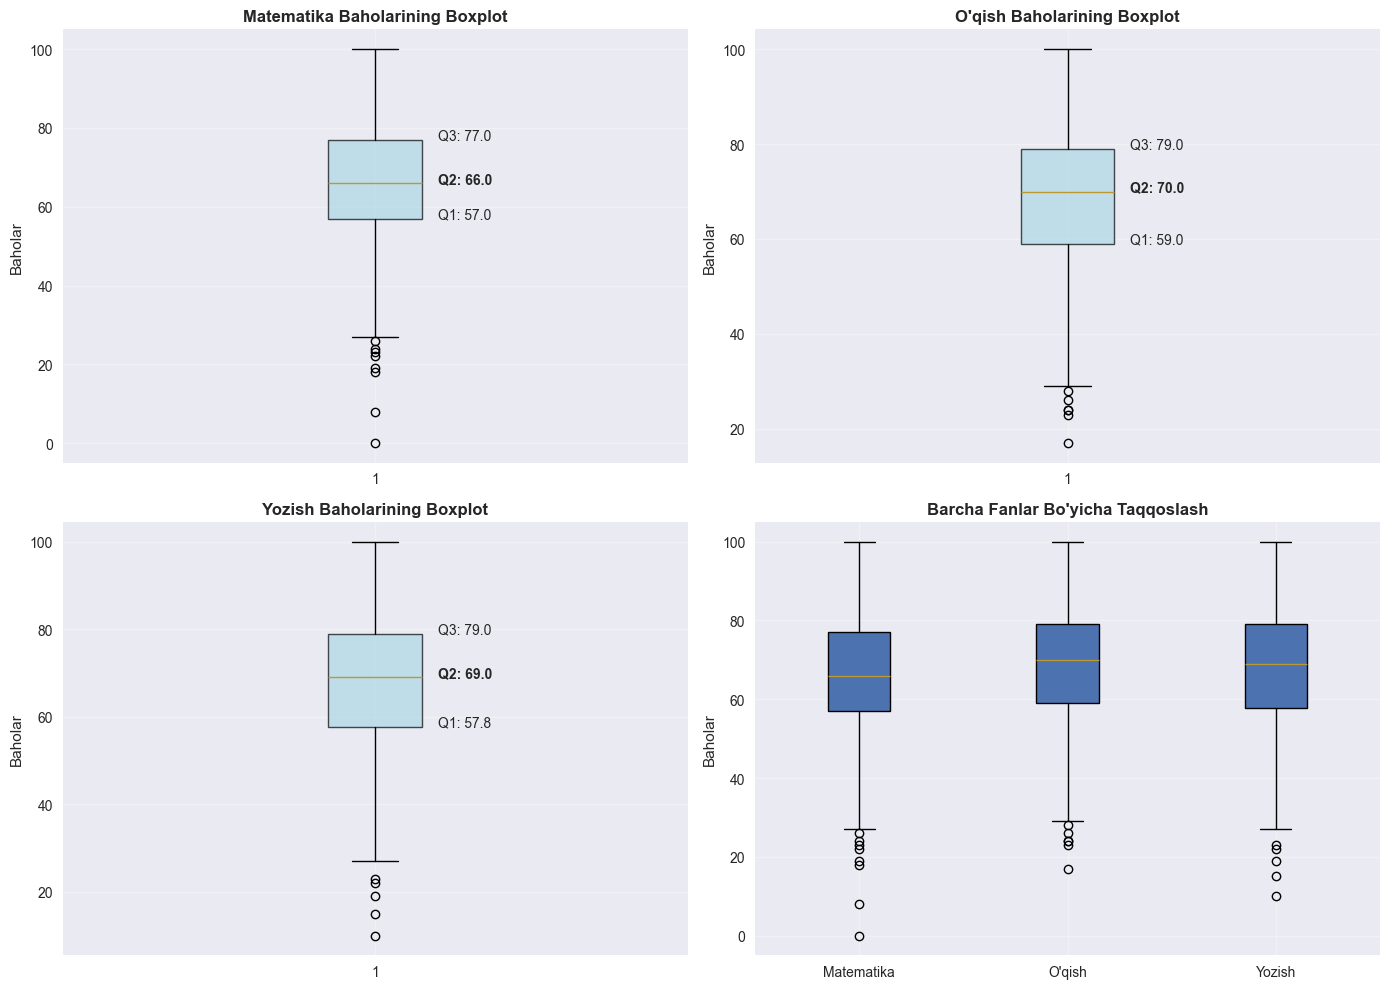

In [33]:
# Create comprehensive boxplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Individual boxplots for each subject
subjects = ['math score', 'reading score', 'writing score']
subject_names = ['Matematika', 'O\'qish', 'Yozish']

for i, (subject, name) in enumerate(zip(subjects, subject_names)):
    row = i // 2
    col = i % 2
    
    bp = axes[row, col].boxplot(df[subject], patch_artist=True)
    bp['boxes'][0].set_facecolor('lightblue')
    bp['boxes'][0].set_alpha(0.7)
    
    axes[row, col].set_title(f'{name} Baholarining Boxplot', fontsize=12, fontweight='bold')
    axes[row, col].set_ylabel('Baholar')
    axes[row, col].grid(True, alpha=0.3)
    
    # Add quartile annotations
    Q1, Q2, Q3 = df[subject].quantile([0.25, 0.5, 0.75])
    axes[row, col].text(1.1, Q1, f'Q1: {Q1:.1f}', fontsize=10)
    axes[row, col].text(1.1, Q2, f'Q2: {Q2:.1f}', fontsize=10, fontweight='bold')
    axes[row, col].text(1.1, Q3, f'Q3: {Q3:.1f}', fontsize=10)

# Comparative boxplot
axes[1, 1].boxplot([df[subject] for subject in subjects], 
                   labels=subject_names, patch_artist=True)
axes[1, 1].set_title('Barcha Fanlar Bo\'yicha Taqqoslash', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Baholar')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

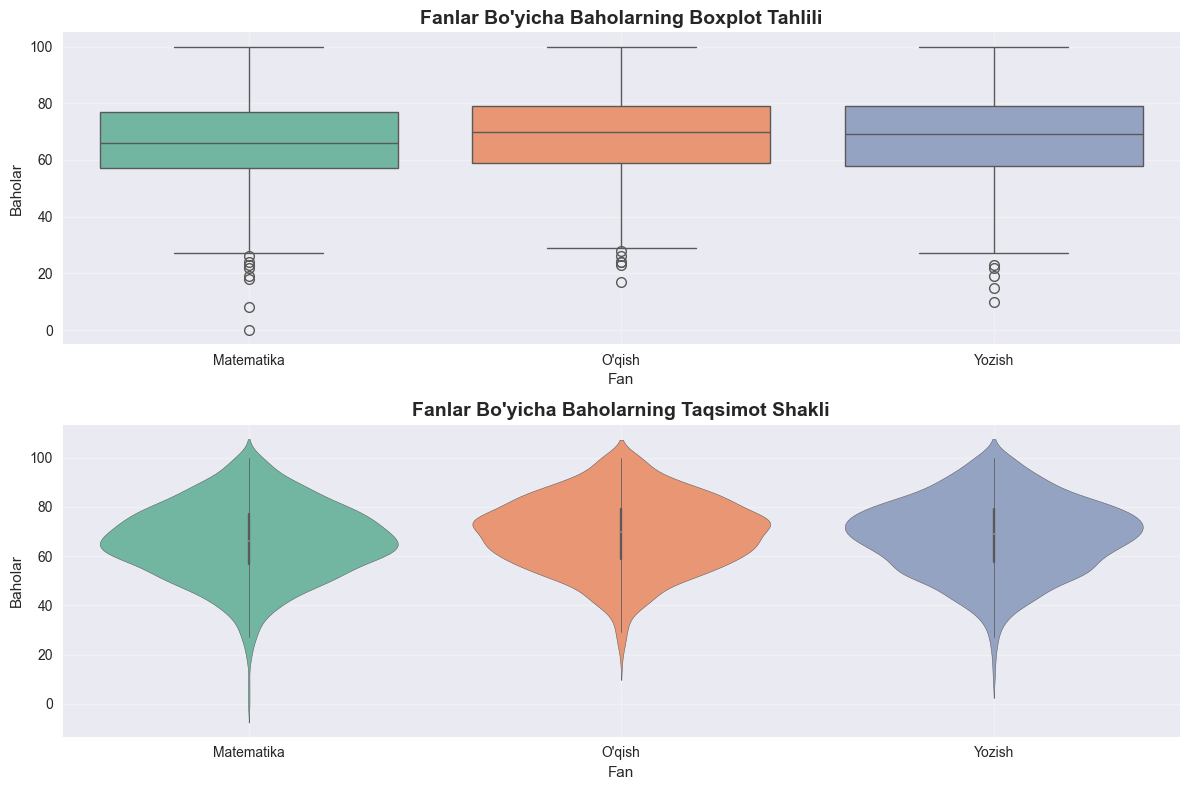

In [34]:
# Advanced boxplot with seaborn for better visualization
plt.figure(figsize=(12, 8))

# Prepare data for seaborn
plot_data = pd.melt(df[['math score', 'reading score', 'writing score']], 
                    var_name='Fan', value_name='Baho')
plot_data['Fan'] = plot_data['Fan'].map({
    'math score': 'Matematika',
    'reading score': 'O\'qish', 
    'writing score': 'Yozish'
})

# Create boxplot with violin plot overlay
plt.subplot(2, 1, 1)
sns.boxplot(data=plot_data, x='Fan', y='Baho', palette='Set2')
plt.title('Fanlar Bo\'yicha Baholarning Boxplot Tahlili', fontsize=14, fontweight='bold')
plt.ylabel('Baholar')
plt.grid(True, alpha=0.3)

# Violin plot for distribution shape
plt.subplot(2, 1, 2)
sns.violinplot(data=plot_data, x='Fan', y='Baho', palette='Set2')
plt.title('Fanlar Bo\'yicha Baholarning Taqsimot Shakli', fontsize=14, fontweight='bold')
plt.ylabel('Baholar')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 7. Outlierlarni Aniqlash Usullari

**Outlier (chetga chiquvchi qiymat)** - boshqa ma'lumotlardan sezilarli darajada farq qiluvchi qiymat.

### Asosiy usullar:
1. **IQR usuli**: Q1 - 1.5×IQR dan kichik yoki Q3 + 1.5×IQR dan katta qiymatlar
2. **Z-score usuli**: |z-score| > 3 bo'lgan qiymatlar  
3. **Modified Z-score usuli**: mediana asosida

In [35]:
def find_outliers_iqr(data, column_name):
    """Find outliers using IQR method"""
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    
    # Define outlier bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Find outliers
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    
    print(f"\n{column_name} uchun IQR usuli bilan outlierlar:")
    print(f"Q1: {Q1:.2f}, Q3: {Q3:.2f}, IQR: {IQR:.2f}")
    print(f"Outlier chegaralari: [{lower_bound:.2f}, {upper_bound:.2f}]")
    print(f"Topilgan outlierlar soni: {len(outliers)}")
    
    if len(outliers) > 0:
        print(f"Outlier qiymatlar: {sorted(outliers.values)}")
    
    return outliers, lower_bound, upper_bound

# Find outliers for all subjects
outlier_results = {}
for subject_name, data in subjects_data.items():
    outliers, lower_bound, upper_bound = find_outliers_iqr(data, subject_name)
    outlier_results[subject_name] = {
        'outliers': outliers,
        'count': len(outliers),
        'lower_bound': lower_bound,
        'upper_bound': upper_bound
    }


Matematika uchun IQR usuli bilan outlierlar:
Q1: 57.00, Q3: 77.00, IQR: 20.00
Outlier chegaralari: [27.00, 107.00]
Topilgan outlierlar soni: 8
Outlier qiymatlar: [np.int64(0), np.int64(8), np.int64(18), np.int64(19), np.int64(22), np.int64(23), np.int64(24), np.int64(26)]

O'qish uchun IQR usuli bilan outlierlar:
Q1: 59.00, Q3: 79.00, IQR: 20.00
Outlier chegaralari: [29.00, 109.00]
Topilgan outlierlar soni: 6
Outlier qiymatlar: [np.int64(17), np.int64(23), np.int64(24), np.int64(24), np.int64(26), np.int64(28)]

Yozish uchun IQR usuli bilan outlierlar:
Q1: 57.75, Q3: 79.00, IQR: 21.25
Outlier chegaralari: [25.88, 110.88]
Topilgan outlierlar soni: 5
Outlier qiymatlar: [np.int64(10), np.int64(15), np.int64(19), np.int64(22), np.int64(23)]


In [36]:
def find_outliers_zscore(data, column_name, threshold=3):
    """Find outliers using Z-score method"""
    z_scores = np.abs(stats.zscore(data))
    outliers = data[z_scores > threshold]
    
    print(f"\n{column_name} uchun Z-score usuli bilan outlierlar (|z| > {threshold}):")
    print(f"Topilgan outlierlar soni: {len(outliers)}")
    
    if len(outliers) > 0:
        outlier_indices = data[z_scores > threshold].index
        outlier_zscores = z_scores[z_scores > threshold]
        print("Outlier qiymatlar va ularning Z-score qiymatlari:")
        for idx, (val, z_val) in enumerate(zip(outliers.values, outlier_zscores)):
            print(f"  {val:.1f} (z-score: {z_val:.2f})")
    
    return outliers

# Find outliers using Z-score method
print("Z-SCORE USULI BILAN OUTLIERLAR:")
print("="*40)

zscore_outliers = {}
for subject_name, data in subjects_data.items():
    outliers = find_outliers_zscore(data, subject_name)
    zscore_outliers[subject_name] = outliers

Z-SCORE USULI BILAN OUTLIERLAR:

Matematika uchun Z-score usuli bilan outlierlar (|z| > 3):
Topilgan outlierlar soni: 4
Outlier qiymatlar va ularning Z-score qiymatlari:
  18.0 (z-score: 3.17)
  0.0 (z-score: 4.36)
  19.0 (z-score: 3.11)
  8.0 (z-score: 3.83)

O'qish uchun Z-score usuli bilan outlierlar (|z| > 3):
Topilgan outlierlar soni: 4
Outlier qiymatlar va ularning Z-score qiymatlari:
  17.0 (z-score: 3.57)
  23.0 (z-score: 3.16)
  24.0 (z-score: 3.10)
  24.0 (z-score: 3.10)

Yozish uchun Z-score usuli bilan outlierlar (|z| > 3):
Topilgan outlierlar soni: 4
Outlier qiymatlar va ularning Z-score qiymatlari:
  10.0 (z-score: 3.82)
  22.0 (z-score: 3.03)
  19.0 (z-score: 3.23)
  15.0 (z-score: 3.49)


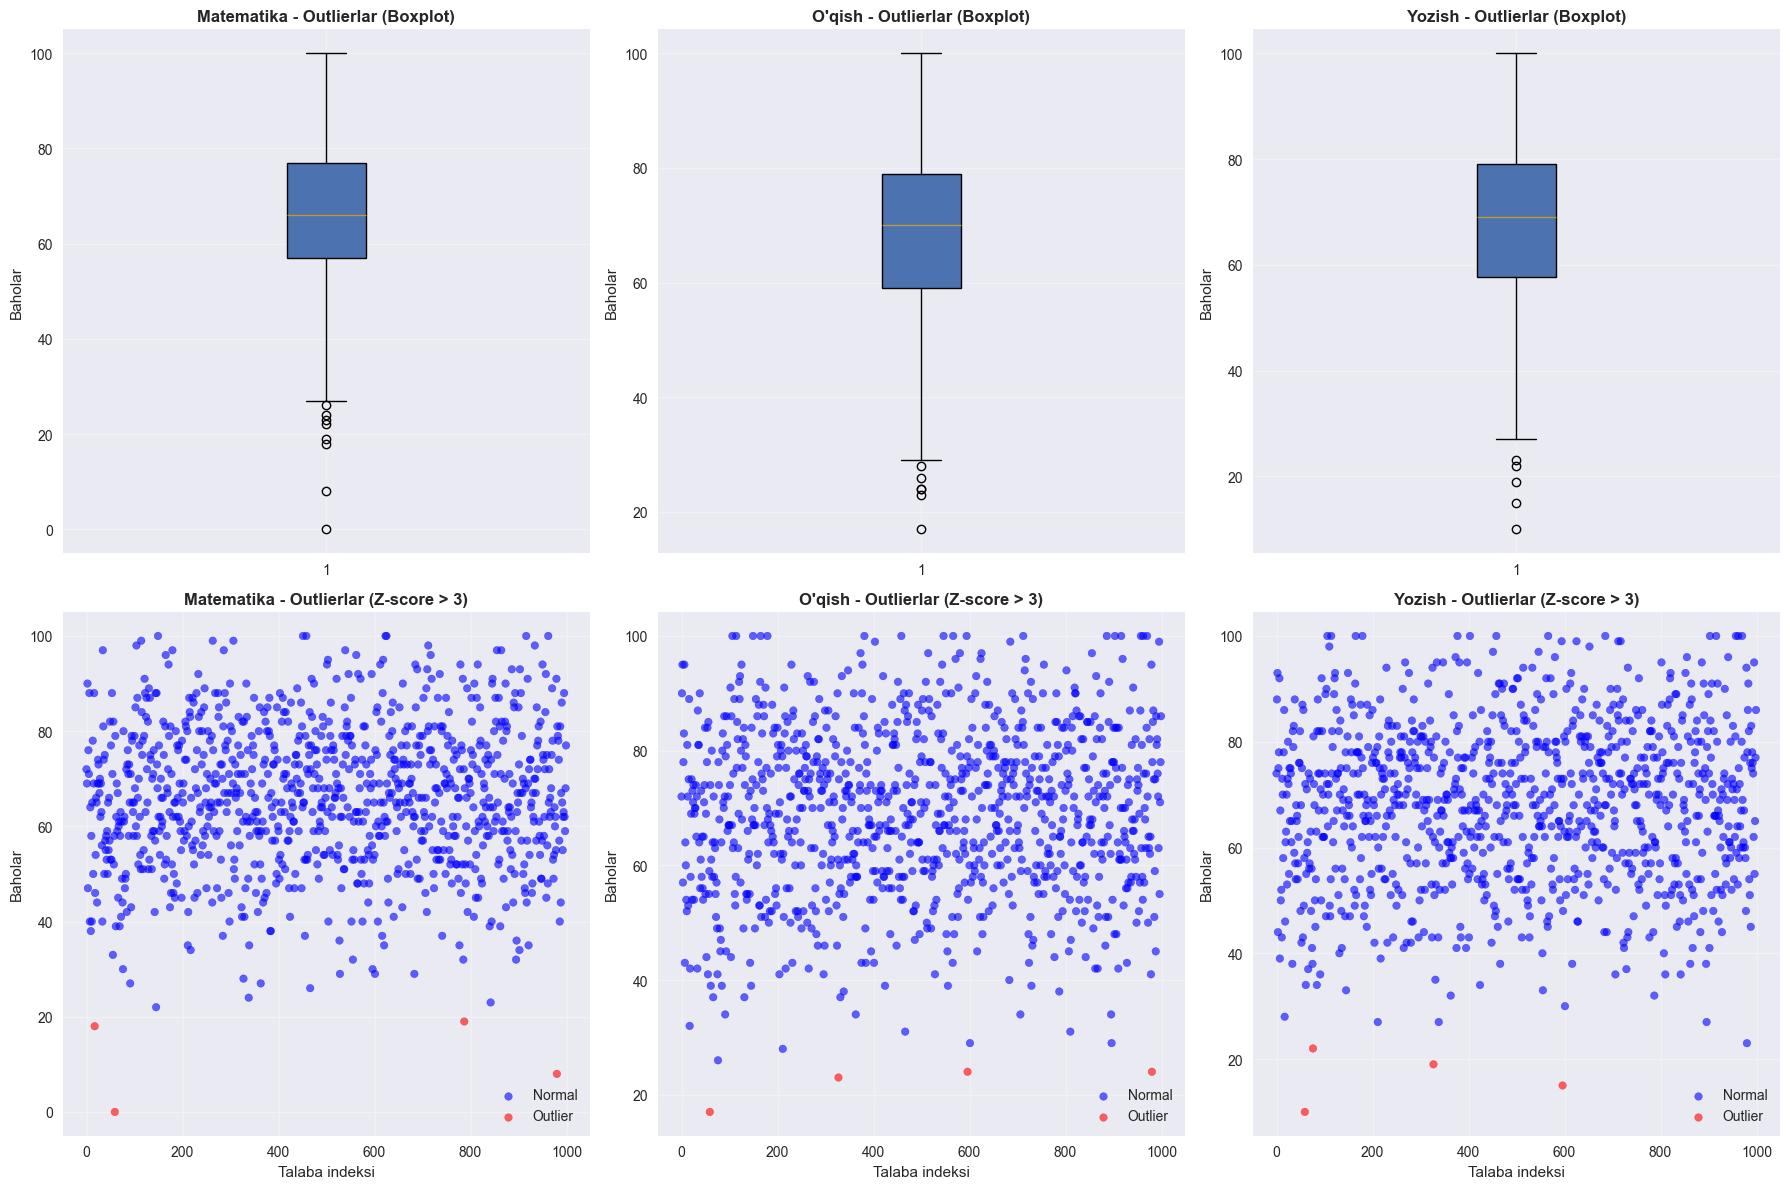

In [37]:
# Visualize outliers
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

subjects = ['math score', 'reading score', 'writing score']
subject_names = ['Matematika', 'O\'qish', 'Yozish']

for i, (subject, name) in enumerate(zip(subjects, subject_names)):
    # Boxplot with outliers highlighted
    axes[0, i].boxplot(df[subject], patch_artist=True)
    axes[0, i].set_title(f'{name} - Outlierlar (Boxplot)', fontweight='bold')
    axes[0, i].set_ylabel('Baholar')
    axes[0, i].grid(True, alpha=0.3)
    
    # Scatter plot with outliers highlighted
    data = df[subject]
    z_scores = np.abs(stats.zscore(data))
    
    # Normal points
    normal_mask = z_scores <= 3
    axes[1, i].scatter(range(len(data)), data, 
                      c=['blue' if normal else 'red' for normal in normal_mask],
                      alpha=0.6, s=30)
    
    axes[1, i].set_title(f'{name} - Outlierlar (Z-score > 3)', fontweight='bold')
    axes[1, i].set_xlabel('Talaba indeksi')
    axes[1, i].set_ylabel('Baholar') 
    axes[1, i].grid(True, alpha=0.3)
    
    # Add legend
    axes[1, i].scatter([], [], c='blue', alpha=0.6, s=30, label='Normal')
    axes[1, i].scatter([], [], c='red', alpha=0.6, s=30, label='Outlier')
    axes[1, i].legend()

plt.tight_layout()
plt.show()

## 8. Outlierlar Bilan Ishlash Strategiyalari

In [38]:
# Compare statistics with and without outliers
def compare_with_without_outliers(data, column_name):
    """Compare statistics with and without outliers"""
    # Original statistics
    original_mean = data.mean()
    original_median = data.median()
    original_std = data.std()
    
    # Remove outliers using IQR method
    Q1, Q3 = data.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    clean_data = data[(data >= lower_bound) & (data <= upper_bound)]
    
    # Clean statistics
    clean_mean = clean_data.mean()
    clean_median = clean_data.median()
    clean_std = clean_data.std()
    
    print(f"\n{column_name} uchun outlierlar ta'sirini tahlil:")
    print("="*50)
    print(f"{'Ko\'rsatkich':<15} {'Asl':<10} {'Toza':<10} {'Farq':<10}")
    print("-"*50)
    print(f"{'O\'rtacha':<15} {original_mean:<10.2f} {clean_mean:<10.2f} {abs(original_mean-clean_mean):<10.2f}")
    print(f"{'Mediana':<15} {original_median:<10.2f} {clean_median:<10.2f} {abs(original_median-clean_median):<10.2f}")
    print(f"{'Standart og\'ish':<15} {original_std:<10.2f} {clean_std:<10.2f} {abs(original_std-clean_std):<10.2f}")
    print(f"{'Ma\'lumotlar soni':<15} {len(data):<10} {len(clean_data):<10} {len(data)-len(clean_data):<10}")
    
    return clean_data

# Analyze impact of outliers for all subjects
clean_data_results = {}
for subject_name, data in subjects_data.items():
    clean_data = compare_with_without_outliers(data, subject_name)
    clean_data_results[subject_name] = clean_data


Matematika uchun outlierlar ta'sirini tahlil:
Ko'rsatkich     Asl        Toza       Farq      
--------------------------------------------------
O'rtacha        66.09      66.48      0.39      
Mediana         66.00      66.00      0.00      
Standart og'ish 15.16      14.56      0.60      
Ma'lumotlar soni 1000       992        8         

O'qish uchun outlierlar ta'sirini tahlil:
Ko'rsatkich     Asl        Toza       Farq      
--------------------------------------------------
O'rtacha        69.17      69.44      0.27      
Mediana         70.00      70.00      0.00      
Standart og'ish 14.60      14.21      0.39      
Ma'lumotlar soni 1000       994        6         

Yozish uchun outlierlar ta'sirini tahlil:
Ko'rsatkich     Asl        Toza       Farq      
--------------------------------------------------
O'rtacha        68.05      68.31      0.25      
Mediana         69.00      69.00      0.00      
Standart og'ish 15.20      14.80      0.39      
Ma'lumotlar soni 1000     

## 9. Amaliy Misol: Jinsga Ko'ra Tahlil

In [39]:
# Analyze scores by gender with percentiles and outliers
gender_analysis = df.groupby('gender')[['math score', 'reading score', 'writing score']].describe(percentiles=[0.25, 0.5, 0.75])

print("Jinsga ko'ra fanlar bo'yicha percentillar tahlili:")
print("="*60)
print(gender_analysis.round(2))

Jinsga ko'ra fanlar bo'yicha percentillar tahlili:
       math score                                              reading score  \
            count   mean    std   min   25%   50%   75%    max         count   
gender                                                                         
female      518.0  63.63  15.49   0.0  54.0  65.0  74.0  100.0         518.0   
male        482.0  68.73  14.36  27.0  59.0  69.0  79.0  100.0         482.0   

               ...              writing score                                  \
         mean  ...   75%    max         count   mean    std   min   25%   50%   
gender         ...                                                              
female  72.61  ...  83.0  100.0         518.0  72.47  14.84  10.0  64.0  74.0   
male    65.47  ...  75.0  100.0         482.0  63.31  14.11  15.0  53.0  64.0   

                      
          75%    max  
gender                
female  82.00  100.0  
male    73.75  100.0  

[2 rows x 24 columns]


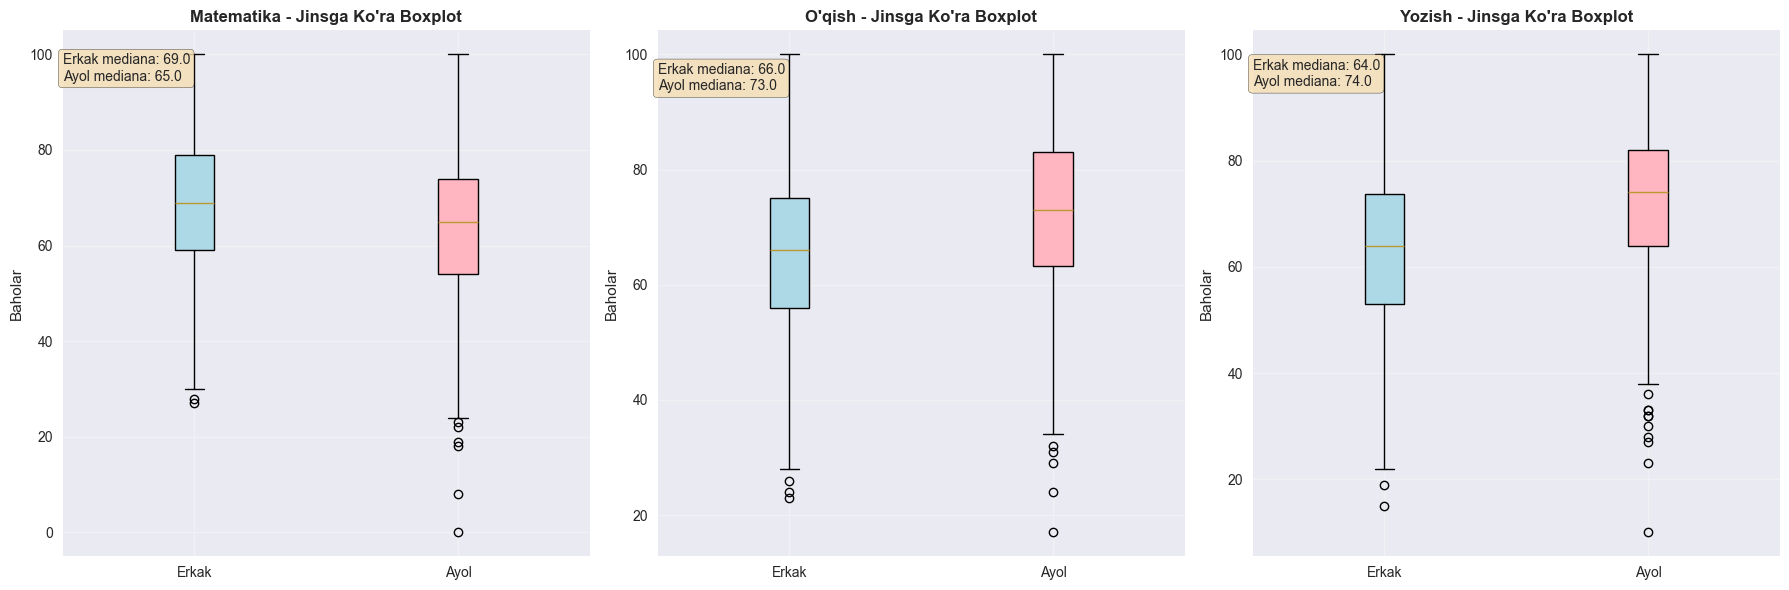

In [40]:
# Create detailed boxplot by gender
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

subjects = ['math score', 'reading score', 'writing score']
subject_names = ['Matematika', 'O\'qish', 'Yozish']

for i, (subject, name) in enumerate(zip(subjects, subject_names)):
    # Create grouped boxplot
    male_scores = df[df['gender'] == 'male'][subject]
    female_scores = df[df['gender'] == 'female'][subject]
    
    bp = axes[i].boxplot([male_scores, female_scores], 
                        labels=['Erkak', 'Ayol'],
                        patch_artist=True)
    
    # Color the boxes
    bp['boxes'][0].set_facecolor('lightblue')
    bp['boxes'][1].set_facecolor('lightpink')
    
    axes[i].set_title(f'{name} - Jinsga Ko\'ra Boxplot', fontweight='bold')
    axes[i].set_ylabel('Baholar')
    axes[i].grid(True, alpha=0.3)
    
    # Add statistical annotations
    male_median = male_scores.median()
    female_median = female_scores.median()
    axes[i].text(0.5, axes[i].get_ylim()[1]*0.9, 
                f'Erkak mediana: {male_median:.1f}\nAyol mediana: {female_median:.1f}',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.show()

## 10. Xulosa va Tavsiyalar

### Asosiy xulosalar:

1. **Kvantillar va Percentillar:**
   - Ma'lumotlar pozitsiyasini aniqlashda muhim vosita
   - Taqsimotning shakli haqida ma'lumot beradi
   - Taqqoslash uchun standart o'lchov

2. **IQR (Interquartile Range):**
   - O'rta 50% ma'lumotlarning tarqalishini ko'rsatadi
   - Outlierlardan kam ta'sirlanadi
   - Robust (mustahkam) o'lchov

3. **Boxplot:**
   - Taqsimotni vizual tahlil qilish uchun ideal
   - Outlierlarni osongina aniqlaydi
   - Guruhlalarni taqqoslashda foydali

4. **Outlierlar:**
   - Har doim "yomon" emas, ba'zan qiziqarli ma'lumot
   - Turli usullar turli natijalar berishi mumkin
   - Kontekstni hisobga olish muhim

### Tavsiyalar:
- Har doim bir nechta usul bilan outlierlarni tekshiring
- Ma'lumotlar tuzilishi va maqsadni hisobga oling
- Outlierlarni o'chirishdan oldin ularning sababini o'rganing
- Robust statistik usullarni qo'llang